# Data Preprocessing
### Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


### Read csv Data "Labtop_data.csv"

In [2]:
#202035532 이가현
#dataSet = pd.read_csv("Cleaned_Laptop_data.csv")
dataSet = pd.read_csv("Laptop_data.csv")
df = pd.DataFrame(dataSet)

### Show brief dataset spec

In [3]:
#step2
print(df.head(5))
print(df.shape)
print(df.index)
print(df.columns)

  brand     model processor_brand processor_name processor_gnrtn ram_gb  \
0  ASUS   Celeron           Intel   Celeron Dual         Missing      4   
1  ASUS  VivoBook           Intel        Core i3            10th      8   
2  ASUS  Vivobook           Intel        Core i3            10th      8   
3    HP      Core           Intel        Core i3            11th      8   
4    HP      Core           Intel        Core i5            11th      8   

  ram_type  ssd   hdd       os  ...  display_size  warranty Touchscreen  \
0     DDR4    0  1024  Windows  ...          15.6         1          No   
1     DDR4  512     0  Windows  ...          15.6         1          No   
2     DDR4    0  1024  Windows  ...          14.1         1          No   
3     DDR4  512     0  Windows  ...          15.6         1          No   
4     DDR4  512     0  Windows  ...          15.6         0          No   

  msoffice  latest_price old_price discount  star_rating  ratings  reviews  
0       No       2399

### missing value control

In [4]:
#check missing data and remove that row
print(df.isnull().sum())
df = df.dropna()
missing = df[df['os']=='Missing'].index
df = df.drop(missing)
print(df.isnull().sum())
print(df.shape)
print(df.info())

#re-setting index
df = df.reset_index()
#df = df[df['weight'] == 'Gaming']



brand               2
model               2
processor_brand     0
processor_name      3
processor_gnrtn     0
ram_gb             25
ram_type           25
ssd                 0
hdd                 0
os                  1
os_bit              1
graphic_card_gb     0
weight              2
display_size        1
warranty            0
Touchscreen         0
msoffice            1
latest_price        1
old_price           0
discount            0
star_rating         0
ratings             0
reviews             0
dtype: int64
brand              0
model              0
processor_brand    0
processor_name     0
processor_gnrtn    0
ram_gb             0
ram_type           0
ssd                0
hdd                0
os                 0
os_bit             0
graphic_card_gb    0
weight             0
display_size       0
warranty           0
Touchscreen        0
msoffice           0
latest_price       0
old_price          0
discount           0
star_rating        0
ratings            0
reviews            

### categorical values control

In [5]:
#categorical columns were converted by one-hot encoding
df_brand = pd.get_dummies(df['brand'])
df_model = pd.get_dummies(df['model'])
df_p_brand = pd.get_dummies(df['processor_brand'])
df_p_name = pd.get_dummies(df['processor_name'])
df_p_gnrtn = pd.get_dummies(df['processor_gnrtn'])
df_ram_gb = pd.get_dummies(df['ram_gb'])
df_ram_type = pd.get_dummies(df['ram_type'])
df_ssd = pd.get_dummies(df['ssd'])
df_hdd = pd.get_dummies(df['hdd'])
df_os = pd.get_dummies(df['os'])
df_os_bit = pd.get_dummies(df['os_bit'])
df_graphic = pd.get_dummies(df['graphic_card_gb'])
df_weight = pd.get_dummies(df['weight'])
df_display = pd.get_dummies(df['display_size'])
df_warranty = pd.get_dummies(df['warranty'])
df_touch = pd.get_dummies(df['Touchscreen'])
df_ms = pd.get_dummies(df['msoffice'])

### feature scaling

In [6]:
#number columns were scaled by standard-scaler
standard = StandardScaler()

latest_price = standard.fit_transform(df['latest_price'].values.reshape(-1,1))
old_price = standard.fit_transform(df['old_price'].values.reshape(-1,1))
discount = standard.fit_transform(df['discount'].values.reshape(-1,1))
star_rating = standard.fit_transform(df['star_rating'].values.reshape(-1,1))
ratings = standard.fit_transform(df['ratings'].values.reshape(-1,1))
reviews = standard.fit_transform(df['reviews'].values.reshape(-1,1))
os_bit = standard.fit_transform(df['os_bit'].values.reshape(-1,1))
vga_gb = standard.fit_transform(df['graphic_card_gb'].values.reshape(-1,1))
warranty = standard.fit_transform(df['warranty'].values.reshape(-1,1))

df_latest_price = pd.DataFrame(latest_price)
df_old_price = pd.DataFrame(old_price)
df_discount = pd.DataFrame(discount)
df_star_rating = pd.DataFrame(star_rating)
df_ratings = pd.DataFrame(ratings)
df_reviews = pd.DataFrame(reviews)
df_os_bit_1 = pd.DataFrame(os_bit)
df_graphic_card_gb_1 = pd.DataFrame(vga_gb)
df_warranty_1 = pd.DataFrame(warranty)

# Clustering

     display_size  processor_gnrtn  processor_name  ram_gb  ssd   hdd
0           15.60                7               7       4    0  1024
1           15.60               12              10       8  512     0
2           14.10               12              10       8    0  1024
3           15.60               13              10       8  512     0
4           15.60               13              11       8  512     0
..            ...              ...             ...     ...  ...   ...
807         13.30                7              14       8  512     0
808         15.60               12              10       8  256  1024
809         14.96               12              10       8    0  1024
810         13.30                7              11       8  128     0
811         14.10               12              10       4    0  1024

[812 rows x 6 columns]


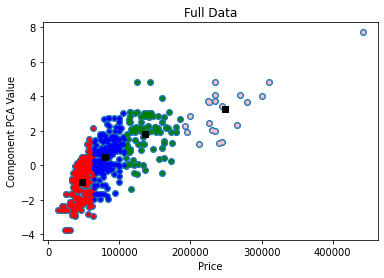

In [7]:
#202035534 이예준
#calculating score for each user
##display size score
display_score = df['display_size'].replace('All',14)
display_score = display_score.astype(float)
display_score = display_score.replace(0,14)
##processor_gnrtn score
gnrtn_score = df['processor_gnrtn'].replace('4th',3)
gnrtn_score = gnrtn_score.replace('7th',6)
gnrtn_score = gnrtn_score.replace('8th',7)
gnrtn_score = gnrtn_score.replace('9th',10)
gnrtn_score = gnrtn_score.replace('10th',12)
gnrtn_score = gnrtn_score.replace('11th',13)
gnrtn_score = gnrtn_score.replace('12th',14)
gnrtn_score = gnrtn_score.replace('Missing',7)
gnrtn_score = gnrtn_score.astype(int)
##processor_name score
name_score = df['processor_name'].replace('A6-9225 Processor',7)
name_score = name_score.replace('APU Dual',7)
name_score = name_score.replace('Athlon Dual',7)
name_score = name_score.replace('Celeron Dual',7)
name_score = name_score.replace('Core m3',7)
name_score = name_score.replace('Dual Core',7)
name_score = name_score.replace('Hexa Core',7)
name_score = name_score.replace('Pentium Quad',7)
name_score = name_score.replace('Pentium Silver',7)
name_score = name_score.replace('Snapdragon 7c',7)
name_score = name_score.replace('Core i3',10)
name_score = name_score.replace('Core i5',11)
name_score = name_score.replace('Core i7',12)
name_score = name_score.replace('Core i9',13)
name_score = name_score.replace('Ryzen 3',11)
name_score = name_score.replace('Ryzen 5',12)
name_score = name_score.replace('Ryzen 7',13)
name_score = name_score.replace('Ryzen 9',14)
name_score = name_score.replace('M1 Processor',14)
name_score = name_score.replace('M1 Max',15)
name_score = name_score.replace('M1 Pro',16)
name_score = name_score.astype(int)
##ram_gb score
ram_gb_score = df['ram_gb'].astype(int)
##ssd score
ssd_score = df['ssd'].astype(int)
##hdd score
hdd_score = df['hdd'].astype(int)

#dataframe
new_df = pd.concat([display_score,gnrtn_score,name_score,ram_gb_score,ssd_score,hdd_score], axis=1)

print(new_df)
#new_df = pd.concat([new_df,df['latest_price']],axis=1)
x = standard.fit_transform(new_df.values)
features = ['display_score','gnrtn_score','name_score','ram_gb_score','ssd_score','hdd_score']

new_df = pd.DataFrame(new_df, columns=features)


#PCA
pca = PCA(n_components=1)
pca_x = pca.fit_transform(x)
pca_new_df = pd.DataFrame(data=pca_x, columns=['pca'])
pca_new_data = pca_new_df.values

plt.scatter(df['latest_price'].values,pca_new_data)

#KMeans Clustering
clust_df = pca_new_df.copy()
clust_df['price'] = df['latest_price'].reset_index(drop=True)
#standard.fit_transform(df['latest_price'].values.reshape(-1,1))

KM = KMeans(n_clusters=4)
KM.fit(clust_df)

centers = KM.cluster_centers_
pred = KM.predict(clust_df)
clust_df['clust'] = pred

targets = [0,1,2,3]
colors = ['r','g','b','pink']

for target, color in zip(targets,colors):
    indicesToKeep = clust_df['clust'] == target
    plt.scatter(clust_df.loc[indicesToKeep, 'price'], clust_df.loc[indicesToKeep, 'pca'], c = color, s = 10)
plt.scatter(centers[:,1], centers[:,0], c='black', s=30, marker='s')
plt.xlabel('Price')
plt.ylabel('Component PCA Value')
plt.title("Full Data")
plt.show()

## data preprocessing for regression


### Ramtype 
#### DDR N  N is generation, LP means for mobile,  Unified is apple chip

In [8]:
print(df['ram_type'].unique())

['DDR4' 'LPDDR4X' 'LPDDR4' 'Unified' 'DDR5' 'LPDDR3' 'DDR3']


In [9]:
int_ram_type = df['ram_type'].replace('DDR3',1)
int_ram_type = int_ram_type.replace('LPDDR3',1)
int_ram_type = int_ram_type.replace('DDR4',2)
int_ram_type = int_ram_type.replace('LPDDR4',2)
int_ram_type = int_ram_type.replace('LPDDR4X',3)
int_ram_type = int_ram_type.replace('DDR5',4)
int_ram_type = int_ram_type.replace('Unified',4)

### Weight
#### weight is ThinNlight < Casual < Gaming

In [10]:
print(df['weight'].unique())   

['Casual' 'ThinNlight' 'Gaming']


In [11]:
int_weight = df['weight'].replace('ThinNlight',1)
int_weight = int_weight.replace('Casual',2)
int_weight = int_weight.replace('Gaming',3)

### Weight

In [12]:
print(df['display_size'].unique())

['15.6' '14.1' '14' '13.3' '17.3' '14.96' '15' '0' '14.2' '16.2' '14.9'
 '13.4' '13' '15.3' '16' '16.1' '13.5' 'All' '12.2' '12']


In [13]:
float_display = df['display_size'].str.replace('All','0').astype(float)
mean_display = float_display.mean()
print(mean_display) #14.593054187192118
float_display = float_display.replace(0,14.593054187192118 )

14.593054187192118


### Label encoding for YES,NO data

In [14]:
labelencoder = LabelEncoder()

df['Touchscreen'] = labelencoder.fit_transform(df['Touchscreen'])
df['msoffice'] =labelencoder.fit_transform(df['msoffice'])
print(df['msoffice'])

0      0
1      0
2      0
3      1
4      0
      ..
807    0
808    0
809    0
810    0
811    0
Name: msoffice, Length: 812, dtype: int32


### Standard Scaling

In [15]:
name_score = standard.fit_transform(name_score.values.reshape(-1,1))
gnrtn_score = standard.fit_transform(gnrtn_score.values.reshape(-1,1))
touchscreen = standard.fit_transform(df['warranty'].values.reshape(-1,1))
msoffice = standard.fit_transform(df['msoffice'].values.reshape(-1,1))
ram_gb_score = standard.fit_transform(ram_gb_score.values.reshape(-1,1))
int_ram_type = standard.fit_transform(int_ram_type.values.reshape(-1,1))
ssd_score =standard.fit_transform(ssd_score.values.reshape(-1,1))
hdd_score = standard.fit_transform(hdd_score.values.reshape(-1,1))
int_weight = standard.fit_transform(int_weight.values.reshape(-1,1))
float_display = standard.fit_transform(float_display.values.reshape(-1,1))
float_display = pd.DataFrame(float_display)
int_weight = pd.DataFrame(int_weight)
ssd_score = pd.DataFrame(ssd_score)
hdd_score = pd.DataFrame(hdd_score)
int_ram_type = pd.DataFrame(int_ram_type)
name_score = pd.DataFrame(name_score)
gnrtn_score = pd.DataFrame(gnrtn_score)
ram_gb_score = pd.DataFrame(ram_gb_score)
df_touchscreen = pd.DataFrame(touchscreen)
df_msoffice = pd.DataFrame(msoffice)

### Create data frame for regression

In [16]:
df_for_reg = pd.concat([name_score,gnrtn_score,ram_gb_score,int_ram_type,ssd_score,hdd_score,df_os,df_os_bit_1,df_graphic_card_gb_1,
                        int_weight,float_display,df_warranty_1,df_touchscreen,df_msoffice,df_old_price,df_discount,df_star_rating,df_ratings,df_reviews],axis=1)

df_for_reg.columns = ['Processor_name','Processor_gnrtn','Ram_gb','Ram_type','SSD','HDD','MAC','WINDOWS','OS_bit','Graphic_card_gb'
    ,'Weight','Display_size','Warranty','Touchscreen','Msoffice','Old_price','Discount','Star_rating','Ratings','Reviews']

# print without skip
pd.set_option('display.max_columns', None)
print("\n\n======== print data frame for regression ========")
print(df_for_reg)



======== print data frame for regression ========
     Processor_name  Processor_gnrtn    Ram_gb  Ram_type       SSD       HDD  \
0         -2.867706        -1.263915 -1.326257 -0.181098 -1.532641  2.046610   
1         -0.816699         0.526558 -0.475609 -0.181098  0.153108 -0.482838   
2         -0.816699         0.526558 -0.475609 -0.181098 -1.532641  2.046610   
3         -0.816699         0.884652 -0.475609 -0.181098  0.153108 -0.482838   
4         -0.133029         0.884652 -0.475609 -0.181098  0.153108 -0.482838   
..              ...              ...       ...       ...       ...       ...   
807        1.917979        -1.263915 -0.475609 -0.181098  0.153108 -0.482838   
808       -0.816699         0.526558 -0.475609 -0.181098 -0.689767  2.046610   
809       -0.816699         0.526558 -0.475609 -0.181098 -1.532641  2.046610   
810       -0.133029        -1.263915 -0.475609 -0.181098 -1.111204 -0.482838   
811       -0.816699         0.526558 -1.326257 -0.181098 -1.532641  

### Check created dataframe

In [17]:
X = df_for_reg
y = df['latest_price']

### Multiple Linear Regression with kfold k=5 , k= 10


=== kfold k is 5 ===
each fold R square : [0.7315280316660977, 0.8585060980618024, 0.7705590983970719, 0.850074149665855, 0.8133588451886771]
mean R square : 0.8048052445959009
coef:  [   565.88697886   1192.72702077  10521.95830833  -2604.63043945
  16744.19879311   5216.18252936  16257.6940362  -16257.6940362
  -1237.39175593   3578.28163395   -373.52359703  -2390.49017821
    300.88099803    300.88099803  -1743.39699607  15981.30470472
 -12821.09629737  -3800.24785212  -5563.18227786   4624.79209386]
intercept:  91043.62685444542


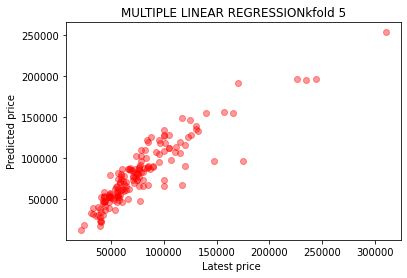

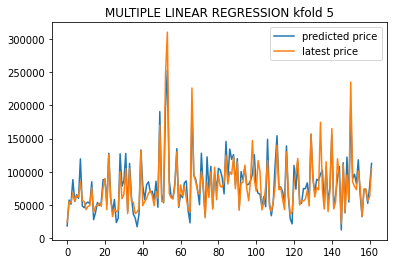

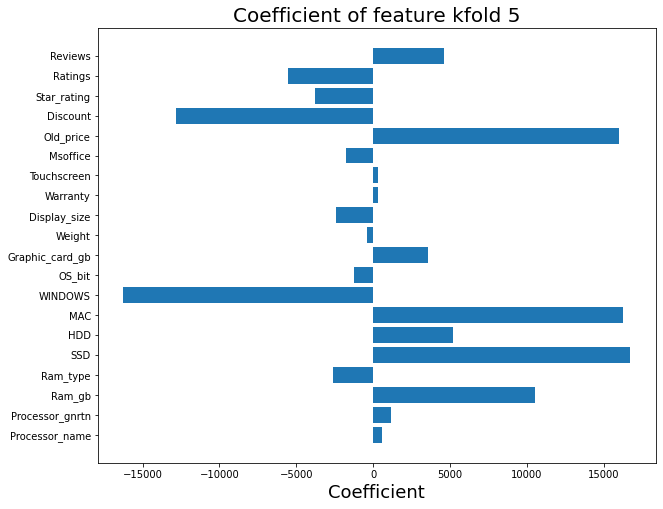


=== kfold k is 10 ===
each fold R square : [0.7507887060296491, 0.7198624784020871, 0.8447355427374477, 0.859152491145666, 0.8569792565946719, 0.7118935634691144, 0.7856666676088313, 0.8884620627760512, 0.7360645918864794, 0.8520402471597021]
mean R square : 0.8005645607809699
coef:  [   639.61519783   1243.78496915  10302.18265909  -2199.73499773
  15853.40377504   5233.38243121  14804.2664295  -14804.2664295
  -1012.15732962   4028.96830206   -551.93230794  -2775.12398114
    895.37100388    895.37100388  -2363.63441827  15918.76164532
 -12912.64420071  -4056.19212731  -5768.49264192   4666.78101671]
intercept:  89345.62681040619


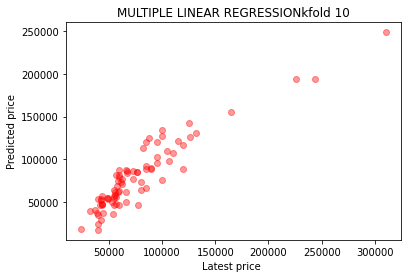

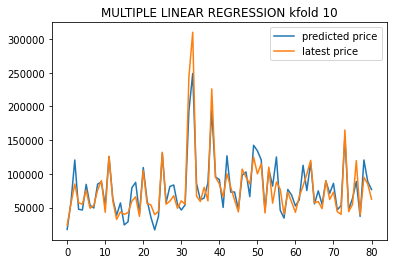

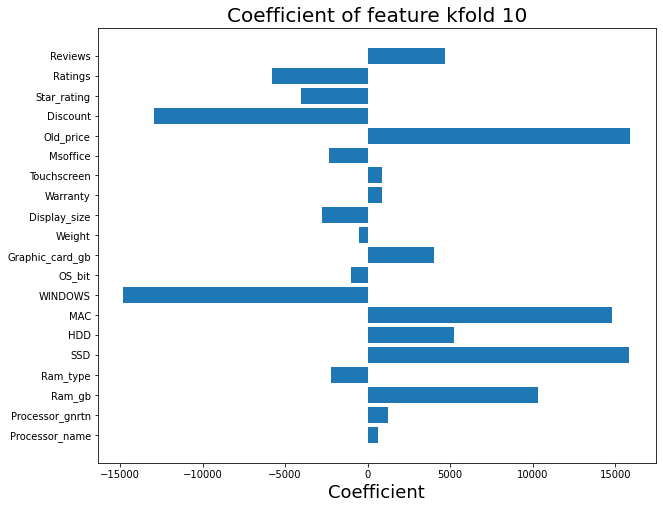

In [18]:
for i in range(5,11,5):
    print('\n=== kfold k is {} ==='.format(i))
    Linear_model = LinearRegression()
    kf = KFold(n_splits = i, shuffle = True, random_state = 50)
    accuracy_history = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        Linear_model.fit(X_train,y_train)
        y_pred = Linear_model.predict(X_test)
        accuracy_history.append(Linear_model.score(X_test,y_test))

    # Evaluation with R squared
    print("each fold R square :", accuracy_history)
    print("mean R square :", np.mean(accuracy_history))
    print("coef: ",Linear_model.coef_)
    print("intercept: ",Linear_model.intercept_)

    #visualize result
    plt.scatter(y_test, y_pred, alpha=0.4,c='red')
    plt.xlabel("Latest price ")
    plt.ylabel("Predicted price")
    plt.title("MULTIPLE LINEAR REGRESSIONkfold {}".format(i))
    plt.show()

    plt.plot(Linear_model.predict(X_test), label="predicted price")
    plt.plot(y_test.values.reshape(-1, 1), label="latest price ")
    plt.title("MULTIPLE LINEAR REGRESSION kfold {}".format(i))
    plt.legend()
    plt.show()

    # coefficients visulization
    plt.figure(figsize=(10,8))
    plt.barh( ['Processor_name','Processor_gnrtn','Ram_gb','Ram_type','SSD','HDD','MAC','WINDOWS','OS_bit','Graphic_card_gb'
        ,'Weight','Display_size','Warranty','Touchscreen','Msoffice','Old_price','Discount','Star_rating','Ratings','Reviews'],np.ravel(Linear_model.coef_))

    plt.title('Coefficient of feature kfold {}'.format(i), fontsize=20)
    plt.xlabel('Coefficient', fontsize=18)
    plt.show()

### Multiple Linear Regression with Holdout method   
### train:test  |  90:10 |  80:20 | 70:30


=== train0.9 | test0.1 ===
R squared : 0.8759801471765463
coef: [  1610.11913566   1196.45730565   9203.72917496  -2116.84814906
  15640.48552219   5207.35234609  17575.324864   -17575.324864
  -1007.46405151   4095.3756097    -322.84615224  -2487.66196354
    799.15184151    799.15184151  -1848.11090989  15466.65876307
 -12492.69552518  -3762.48253594  -7596.52952837   6323.48411684]
intercept: 91370.54724389003


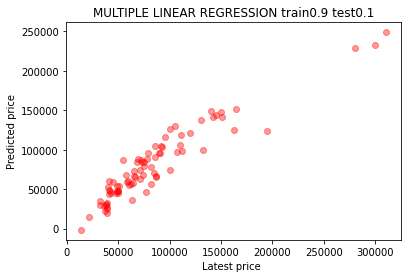

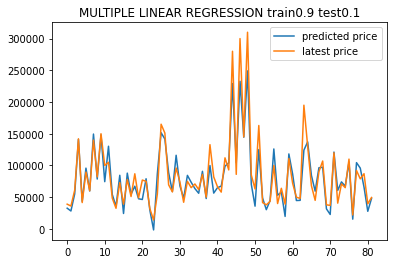

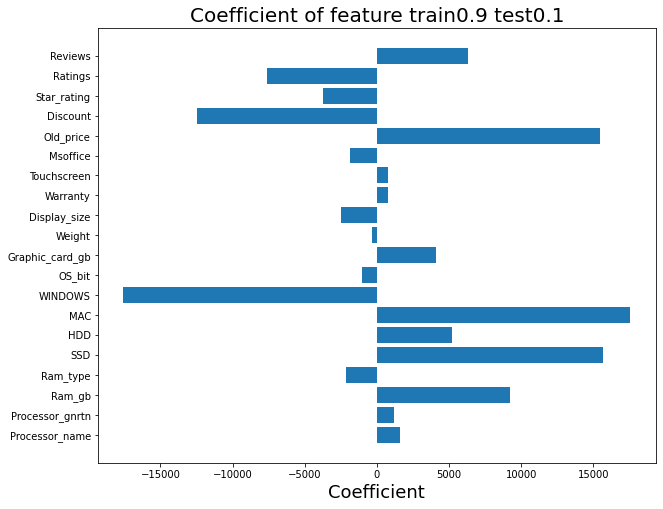


=== train0.8 | test0.2 ===
R squared : 0.734654914229439
coef: [  3774.6273487    1582.79467401   7212.16723287  -1715.02140994
   6137.39280541   1577.60529037  13453.77359677 -13453.77359677
    139.8284614    4686.90736187    -90.93100854  -2761.40262638
   1033.35399273   1033.35399273  -1715.04890838  21139.34627557
 -12824.75819649  -4372.70198112  -7305.54782969   6071.42138624]
intercept: 87125.27007632247


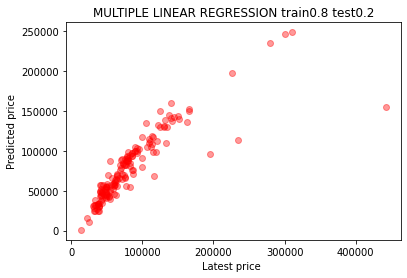

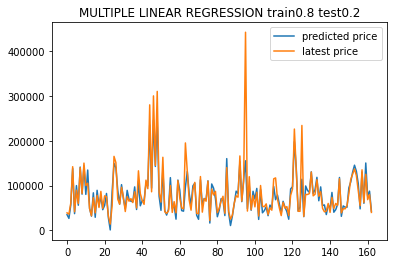

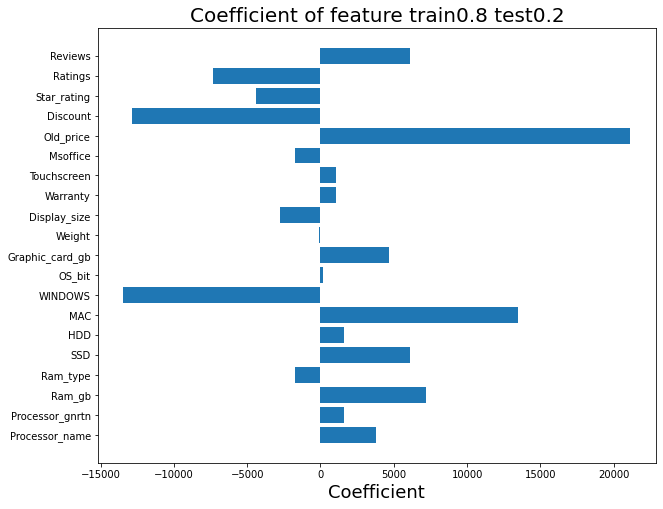


=== train0.7 | test0.3 ===
R squared : 0.7666769858158478
coef: [  3786.90672648   1449.75301888   7752.33367544  -1944.04052344
   5967.20545634   1632.40278623  14361.01378431 -14361.01378431
    398.00225675   4680.15201938   -339.8164743   -2859.48896028
   1201.0738699    1201.0738699   -1842.36353528  20601.0040696
 -13095.93976719  -4779.74006431  -7361.31372697   5564.49579055]
intercept: 87915.70745674323


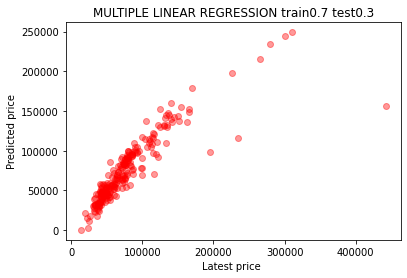

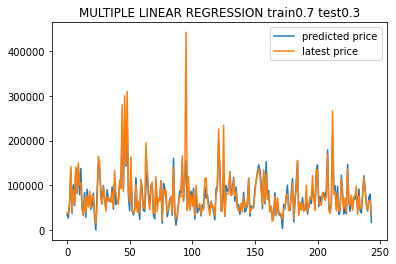

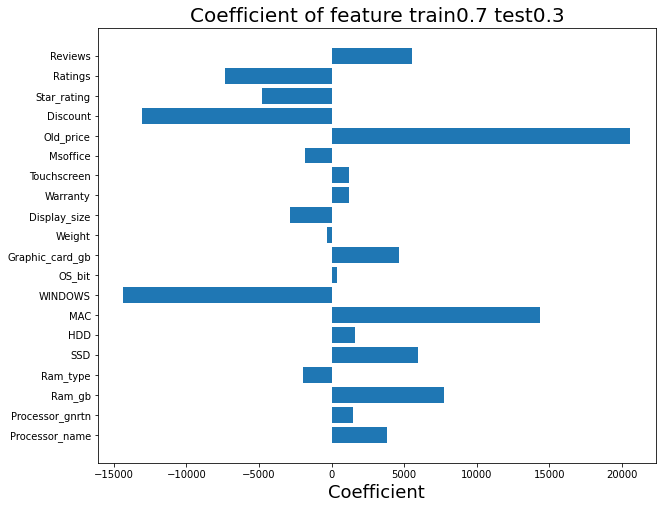

In [19]:

for i in range(1,4):
    print('\n=== train{} | test{} ==='.format((10-i)/10,i/10))

    x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=i/10, random_state=1,shuffle=True)

    #get model
    linear_reg = LinearRegression()

    # fit the model to the training data
    linear_reg.fit(x_train, y_train)

    y_pred = linear_reg.predict(x_test)
    
    # Evaluation with R squared
    print("R squared :", linear_reg.score(x_test, y_test))
    print('coef: {}'.format(linear_reg.coef_))
    print('intercept: {}'.format(linear_reg.intercept_))
    
    #visualize result
    plt.scatter(y_test, y_pred, alpha=0.4, c='red')
    plt.xlabel("Latest price ")
    plt.ylabel("Predicted price")
    plt.title("MULTIPLE LINEAR REGRESSION train{} test{}".format((10-i)/10,i/10))
    plt.show()

    plt.plot(linear_reg.predict(x_test), label="predicted price")
    plt.plot(y_test.values.reshape(-1, 1), label="latest price ")
    plt.title("MULTIPLE LINEAR REGRESSION train{} test{}".format((10-i)/10,i/10))
    plt.legend()
    plt.show()

    # coefficients visulization
    plt.figure(figsize=(10,8))
    plt.barh(['Processor_name', 'Processor_gnrtn', 'Ram_gb', 'Ram_type', 'SSD', 'HDD', 'MAC', 'WINDOWS', 'OS_bit',
              'Graphic_card_gb', 'Weight', 'Display_size', 'Warranty', 'Touchscreen', 'Msoffice', 'Old_price', 'Discount',
              'Star_rating', 'Ratings', 'Reviews'], np.ravel(linear_reg.coef_))
    plt.title('Coefficient of feature train{} test{}'.format((10-i)/10,i/10), fontsize=20)
    plt.xlabel('Coefficient', fontsize=18)

    plt.show()
